<h1 style='text-align:center; color:'#007BFF'><b>Prediksi Harga Saham ISAT.JK dengan Time Series Forecasting</b></h1>
<h5 style="text-align: center;"> Dukun Handal [JCDS-2704]</h2>

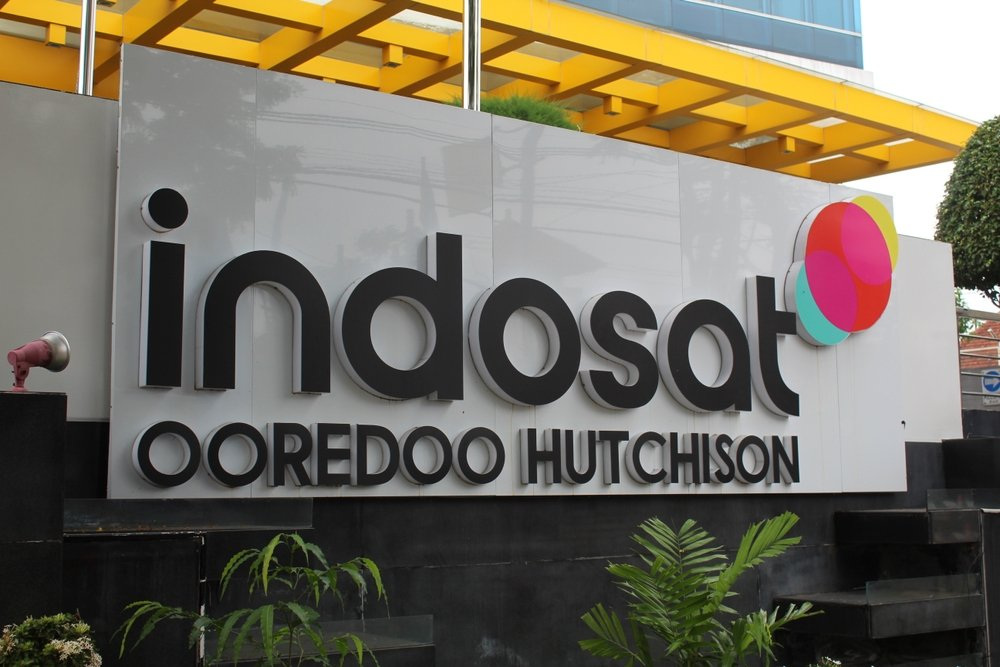

## **Business Problem Understanding**
____

### **Context**

**Indosat Ooredoo Hutchison (ISAT.JK)** adalah salah satu perusahaan telekomunikasi terbesar di Indonesia yang sahamnya diperdagangkan di **Bursa Efek Indonesia (BEI)**. Harga saham **ISAT.JK** dipengaruhi oleh berbagai faktor, seperti **kinerja perusahaan**, **kondisi makroekonomi**, **persaingan industri**, **sentimen pasar**, dan **peristiwa global**. Sebagai instrumen investasi yang volatil, **prediksi pergerakan harga saham ISAT.JK** menjadi krusial bagi investor, analis keuangan, dan pemangku kepentingan untuk mengambil keputusan yang informatif, baik dalam hal pembelian, penjualan, maupun strategi portofolio.


### **Problem Statement**

Meskipun data historis harga saham **ISAT.JK** tersedia, ketidakpastian pergerakan harga akibat dinamika pasar yang kompleks membuat prediksi jangka pendek maupun menengah menjadi sulit. **Tantangan utama** meliputi:  
1. **Volatilitas tinggi**: Fluktuasi harga harian yang dipengaruhi sentimen pasar dan faktor eksternal.  
2. **Ketergantungan pada faktor multidimensi**: Harga saham tidak hanya bergantung pada data historis, tetapi juga indikator ekonomi, kinerja perusahaan, dan berita industri.  
3. **Kebutuhan akan keputusan real-time**: Investor membutuhkan prediksi akurat untuk meminimalkan risiko dan memaksimalkan keuntungan.  

Tanpa model *forecasting* yang andal, keputusan investasi berisiko menjadi **suboptimal** atau bahkan merugikan.  

### **Goals** 

1. **Mengembangkan model time series forecasting** untuk memprediksi harga penutupan (*closing price*) saham **ISAT.JK** dalam jangka waktu tertentu (misalnya, 7-30 hari ke depan).  
2. **Menganalisis pola historis** dan faktor-faktor yang signifikan memengaruhi pergerakan harga saham.  
3. **Mengevaluasi performa model** untuk memastikan akurasi dan keandalan prediksi.  
4. **Memberikan rekomendasi strategis** berdasarkan hasil prediksi kepada investor atau pihak terkait.  

### **Analytic Approach**  

1. **Data Collection**: 
   - Mengumpulkan data historis harga saham **ISAT.JK** (*open*, *close*, *high*, *low*, volume perdagangan) dari sumber tepercaya.  

2. **Understanding and Preprocessing**:  
   - Menganalisa tren dari data
   - Pembagian data dengan *time-based splitting*.
3. **Model Development**:  
   - Membandingkan algoritma seperti **ARIMA**, **SARIMA**, atau **Prophet**.  
   - Menguji kombinasi fitur teknis (harga historis).  
5. **Interpretasi Hasil**: 
   - Analisis residual, identifikasi pola error, dan optimasi *hyperparameter*.  

### **Metric Evaluation**

**Metrik evaluasi utama**:  
1. **MAE (Mean Absolute Error)**: Mengukur rata-rata kesalahan absolut prediksi.  
2. **RMSE (Root Mean Squared Error)**: Memberikan bobot lebih tinggi pada kesalahan besar.  
3. **MAPE (Mean Absolute Percentage Error)**: Menilai persentase kesalahan relatif terhadap harga aktual.  
4. **R-squared (R²)**: Mengevaluasi seberapa baik variasi data dijelaskan oleh model.  

**Kriteria Sukses**:  
- Model dianggap baik jika **MAPE < 5%** pada data uji.  
- Prediksi harus konsisten mengikuti **tren aktual**, termasuk dalam kondisi pasar volatil.  
- Model harus mengungguli **baseline** (contoh: prediksi naive menggunakan harga hari sebelumnya).  


## **Data Understanding**

Permasalahan di atas akan dianalisis menggunakan dataset yang berisi data historis harga saham **ISAT.JK**. Dataset ini diambil dari **Yahoo Finance**, sebuah platform terpercaya yang menyediakan data keuangan dan pasar saham. Dataset ini dapat diakses melalui link berikut: [Download Dataset ISAT.JK](https://finance.yahoo.com/quote/ISAT.JK/history?p=ISAT.JK).  

____

In [32]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from scipy.stats import boxcox
from scipy.special import inv_boxcox
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')


In [33]:
df = pd.read_csv("ISAT-JK.csv", parse_dates=True).drop(columns='Unnamed: 0')
df

Date        Close
0    2022-06-02  1178.004395
1    2022-06-03  1183.082031
2    2022-06-06  1117.073120
3    2022-06-07  1111.995483
4    2022-06-08  1259.245972
..          ...          ...
477  2024-05-27  2385.531494
478  2024-05-28  2555.926514
479  2024-05-29  2537.669922
480  2024-05-30  2476.814453
481  2024-05-31  2482.899902

[482 rows x 2 columns]

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    482 non-null    object 
 1   Close   482 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.7+ KB


**Merubah  kolom `Date` dari object menjadi DateTime**

In [35]:
df['Date'] = pd.to_datetime(df['Date'])

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    482 non-null    datetime64[ns]
 1   Close   482 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.7 KB


In [37]:
display(df['Date'].min(), df['Date'].max())

Timestamp('2022-06-02 00:00:00')

Timestamp('2024-05-31 00:00:00')

In [38]:
df[['Close']].describe()

Close
count   482.000000
mean   1943.051376
std     477.595129
min    1111.995483
25%    1484.075684
50%    1837.427002
75%    2342.932617
max    2933.229980

**Overall Trend**

In [39]:
fig = go.Figure([go.Scatter(name='Actual', x=df['Date'], y=df['Close'])])

fig.update_layout(
    title='Pergerakan Harga Saham ISAT.JK', 
    xaxis_title='Tanggal',
    yaxis_title='Harga Penutupan',
    xaxis=dict(
        rangeslider=dict(visible=True),
        showgrid=True 
    ),
    yaxis=dict(
        showgrid=True  
    )
)

fig.show()


**Karakteristik Dataset**:  
- **Periode Waktu**: Data mencakup periode 2 tahun.  
- **Frekuensi**: Data harian (*daily*).  
- **Ukuran Dataset**: 482 baris data.  
- **Variabel**: 2 kolom utama (Date, Close).  

**Tantangan Data**:  
1. **Missing Values**: Kemungkinan adanya hari libur atau hari tanpa perdagangan yang menyebabkan data kosong.  
2. **Outliers**: Fluktuasi ekstrem harga saham akibat peristiwa tertentu.  
3. **Volatilitas Tinggi**: Pola data yang tidak stabil, memerlukan preprocessing khusus.  

**Ringkasan Statistik**:
1. Rata-rata `Close` adalah 1943.05.
1. Data cukup fluktuatif, dengan deviasi standar untuk `Close` adalah 477.59, menunjukkan fluktuasi besar dalam harga penutupan (*closing price*) saham **ISAT.JK**

**Ringkasan Analis Tren Harga Saham**:

1. **Tren Awal (Mei 2022 - Desember 2022)**

    - **Kenaikan Harga**: Harga saham **ISAT.JK** mengalami kenaikan dari sekitar 1.200 pada Mei 2022 menuju sekitar 1.750 pada Agustus 2022.
    - **Koreksi dan Fluktuasi**: Setelah mencapai puncak tersebut, harga saham mengalami koreksi dan fluktuasi yang signifikan hingga Desember 2022, turun mendekati 1.300.

2. **Pemulihan dan Awal Tren Naik (Januari 2023 - Mei 2023)**

    - **Pemulihan Bertahap**: Harga mulai pulih secara bertahap setelah mengalami titik terendah pada awal 2023.
    - **Kenaikan Stabil**: Dari Februari hingga Mei 2023, harga saham **ISAT.JK** menunjukkan kenaikan yang stabil, melewati angka 2.000.

3. **Tren Naik yang Kuat (Juni 2023 - Maret 2024)**

    - **Bullish Signifikan**: Saham menunjukkan tren bullish yang kuat, mencapai puncaknya di sekitar 2.900 pada awal 2024.
    - **Optimisme Pasar**: Kenaikan yang signifikan ini mencerminkan optimisme pasar terhadap prospek **ISAT.JK**.

4. **Koreksi dan Konsolidasi (Maret 2024 - Juni 2024)**

    - **Penurunan dan Volatilitas**: Setelah mencapai puncak, harga saham mulai mengalami penurunan dengan volatilitas yang meningkat.
    - **Kisaran Harga**: Harga saham turun ke kisaran 2.500, yang menunjukkan kemungkinan adanya fase konsolidasi atau koreksi lebih lanjut.

- **Tren Jangka Panjang**: Secara keseluruhan, tren jangka panjang cenderung bullish meskipun ada beberapa periode koreksi.

- **Proyeksi Ke Depan**: Jika harga bertahan di atas 2.500, maka tren naik berpotensi berlanjut. Namun, jika harga terus turun, maka bisa terjadi fase konsolidasi sebelum harga menentukan arah baru.


Dengan dataset ini, analisis akan difokuskan pada pola historis dan pengembangan model *time series forecasting* untuk memprediksi harga penutupan (*closing price*) saham **ISAT.JK**.

## **Modeling and Evaluation**

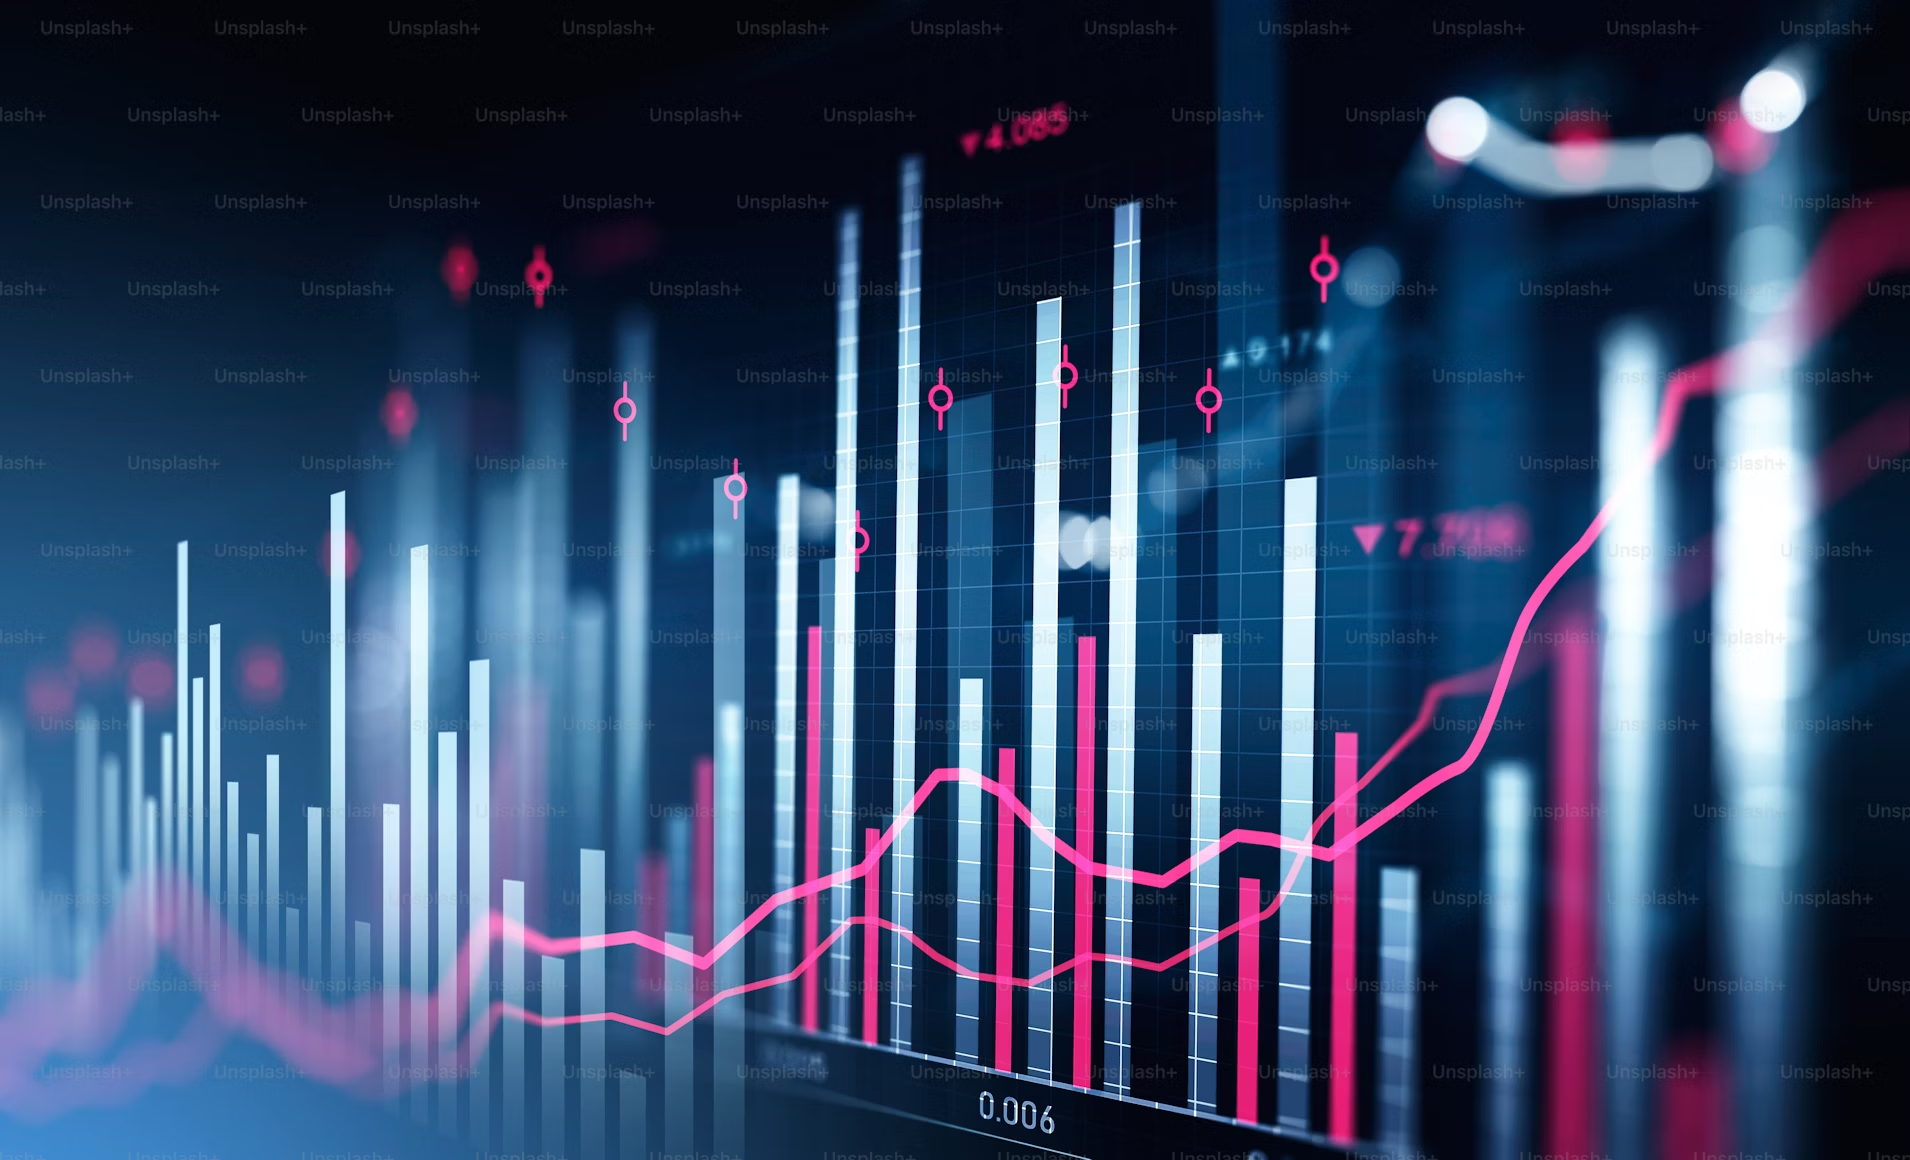

### **Split Data**

In [40]:
train = df[(df['Date'] > '2022-06-01') & (df['Date'] < '2023-06-01')]
test = df[(df['Date'] > '2023-06-01') & (df['Date'] < '2024-06-01')]
display(len(train),len(test))

248

234

> - Dataset dibagi menjadi set pelatihan dan set pengujian untuk menghindari kebocoran data.

###  **ARIMA**

ARIMA (Autoregressive Integrated Moving Average) adalah model statistik untuk analisis deret waktu yang menggabungkan tiga komponen: autoregressive (AR), yang menggunakan nilai masa lalu untuk prediksi; integrated (I), yang membuat data stasioner melalui differencing; dan moving average (MA), yang menggunakan kesalahan prediksi sebelumnya.

In [41]:
import itertools
from statsmodels.tsa.arima.model import ARIMA

p = q = range(0, 10)
d = 1

pdq = [(x, d, y) for x, y in itertools.product(p, q)]

results = []

for param in pdq:
    try:
        model = ARIMA(train['Close'], order=param)

        model_fit = model.fit()

        forecast_steps = len(test)
        arima_forecast = model_fit.forecast(steps=forecast_steps)

        arima_mae = mean_absolute_error(test['Close'], arima_forecast)

        results.append((param, arima_mae))

    except Exception as e:
        continue

# Sort the results based on RMSE in descending order
sorted_results_arima = sorted(results, key=lambda x: x[1], reverse=False)

sorted_results_arima = pd.DataFrame(sorted_results_arima).sort_values(1, ascending=True).rename({0:'order', 1:'mae'}, axis=1)
sorted_results_arima.head()

order         mae
0  (8, 1, 6)  124.835541
1  (7, 1, 7)  134.671326
2  (6, 1, 6)  173.319015
3  (6, 1, 7)  203.369839
4  (8, 1, 7)  237.841471

 Model **ARIMA** disesuaikan melalui **pencarian grid** pada berbagai nilai parameter **(p, d, q)** untuk mendapatkan performa terbaik.  
 
 - **Parameter Non-Musiman:**  
 
    - **p** (**Autoregressive**): Jumlah pengamatan lag yang digunakan dalam model.  
    - **d** (**Differencing**): Jumlah perbedaan yang diperlukan agar data menjadi **stasioner** (**ditetapkan ke 1** dalam kasus ini).  
    - **q** (**Moving Average**): Ukuran jendela rata-rata bergerak yang digunakan dalam model.  
 
 - **Strategi Penyetelan:**  

     ✅ Pencarian grid dilakukan pada kombinasi nilai **p** dan **q** (dari **0 hingga 9**) dengan **d = 1**.  
     ✅ **MAE (Mean Absolute Eror)** dihitung untuk setiap kombinasi.  
     ✅ Model terbaik dipilih berdasarkan **nilai MAE terendah**.  
 
 - **Hasil:**  

     📌 Semua hasil dievaluasi, diurutkan, dan ditampilkan.  
     📌 Model ARIMA dengan **RMSE terendah** dipilih untuk meramalkan **tren masa depan** secara lebih akurat.  

In [42]:
model=ARIMA(train['Close'],order=sorted_results_arima.iloc[0]['order'])

model_fit=model.fit()

forecast_length=234
forecast_result=model_fit.forecast(forecast_length)

mean_absolute_error(test['Close'], forecast_result)

124.83554064128806

In [43]:
new_date=list(test['Date'].unique())

df_forecast_arima=pd.DataFrame({'Date':new_date,'Close':forecast_result})
df_forecast_arima

Date        Close
248 2023-06-05  2025.962971
249 2023-06-06  2026.114759
250 2023-06-07  2026.509154
251 2023-06-08  2034.425268
252 2023-06-09  2046.966466
..         ...          ...
477 2024-05-27  2446.810431
478 2024-05-28  2445.982792
479 2024-05-29  2446.417277
480 2024-05-30  2447.871896
481 2024-05-31  2448.789706

[234 rows x 2 columns]

In [ ]:
fig = go.Figure([go.Scatter(name='Actual', x=test['Date'], y=test['Close'])])

fig.update_layout(
    title='Hasil Prediksi Harga Saham ISAT.JK', 
    xaxis_title='Tanggal',
    yaxis_title='Harga Penutupan',
    xaxis=dict(
        rangeslider=dict(visible=True),
        showgrid=True 
    ),
    yaxis=dict(
        showgrid=True  
    )
)

fig.add_trace(go.Scatter(name='Prediction', x=df_forecast_arima['Date'], y=df_forecast_arima['Close']))
fig.show()

**Penyetelan & Evaluasi Model ARIMA**  

- **Strategi Penyetelan:**  

    ✅ Menetapkan **d = 1** (urutan pembedaan).  
    ✅ Melakukan **pencarian grid** pada nilai **p** dan **q** dalam kisaran **0 hingga 10**.  
    ✅ Model terbaik dipilih berdasarkan **MAE (Mean Absolute Error)** terendah.  

- **Pemilihan Model Terbaik:**  

    📌 Model dengan **MAE terendah** dipilih sebagai **ARIMA(8,1,6)** untuk peramalan.  

- **Evaluasi:**  

   📊 Model **ARIMA(8,1,6)** digunakan untuk **meramalkan 12 bulan ke depan**.  
   📊 Keakuratan model dievaluasi menggunakan **MAE pada data uji**, dengan hasil **124,8**. 

### **SARIMA**

SARIMA (Seasonal Autoregressive Integrated Moving Average) adalah pengembangan dari ARIMA yang memperhitungkan komponen musiman dalam data deret waktu. Model ini menambahkan empat elemen tambahan untuk menangani musiman: seasonal autoregressive (SAR), seasonal differencing (SI), seasonal moving average (SMA), dan panjang periode musiman (m).

In [45]:
p = q = range(0, 5)
d = 1
P = Q = range(0, 2)
D = 1
s = 12

pdq = [(x, d, y) for x, y in itertools.product(p, q)]
seasonal_pdq = [(x, D, y, s) for x, y in itertools.product(P, Q)]

results = []

for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            model = SARIMAX(train['Close'], order=param, seasonal_order=seasonal_param)

            model_fit = model.fit(disp=False)

            forecast_steps = len(test)
            sarima_forecast = model_fit.forecast(steps=forecast_steps)

            sarima_mae = mean_absolute_error(test['Close'], sarima_forecast)

            results.append((param, seasonal_param, sarima_mae))

        except Exception as e:
            continue

# Convert the results to a DataFrame and sort based on RMSE in ascending order
sorted_results_sarima = pd.DataFrame(results, columns=['order', 'seasonal_order', 'mae']).sort_values('mae', ascending=True)

sorted_results_sarima.head()

order seasonal_order         mae
44  (2, 1, 1)  (0, 1, 0, 12)  137.564206
52  (2, 1, 3)  (0, 1, 0, 12)  138.018333
28  (1, 1, 2)  (0, 1, 0, 12)  138.296451
76  (3, 1, 4)  (0, 1, 0, 12)  138.321951
92  (4, 1, 3)  (0, 1, 0, 12)  139.743150

**Penyiapan & Evaluasi Model SARIMA**  

- **Penyiapan Model:**  

   ✅ **SARIMA** memperluas **ARIMA** dengan menambahkan **parameter musiman** **(P, D, Q, s)** untuk menangkap pola musiman.  
   ✅ **Pencarian grid** digunakan untuk menguji berbagai kombinasi **(p, d, q)** dan **(P, D, Q, s)**.  

- **Evaluasi:**  

   📊 Setiap kombinasi parameter dievaluasi menggunakan **MAE (Mean Absolute Error)** pada **data uji**.  
   📊 Model dengan **MAE terendah** dipilih sebagai model dengan kinerja terbaik.  

- **Perbedaan Utama dari ARIMA:**  

   📌 **SARIMA** memperhitungkan pola **musiman** dengan menambahkan **(P, D, Q, s)**.  
   📌 Model ini efektif dalam menangkap **tren berulang dalam periode tetap** (misalnya, siklus bulanan).  


In [46]:
model=SARIMAX(train['Close'],order=sorted_results_sarima.iloc[0]['order'], seasonal_order=sorted_results_sarima.iloc[0]['seasonal_order'])

model_fit=model.fit()

forecast_length=234
forecast_result=model_fit.forecast(forecast_length)

mean_absolute_error(test['Close'], forecast_result)

137.56420587247612

In [47]:
sarima_date=list(test['Date'].unique())

df_forecast_sarima=pd.DataFrame({'Date':sarima_date,'Close':forecast_result})
df_forecast_sarima

Date        Close
248 2023-06-05  1974.645271
249 2023-06-06  1901.761794
250 2023-06-07  1930.575886
251 2023-06-08  1966.622560
252 2023-06-09  1921.410106
..         ...          ...
477 2024-05-27  2647.866674
478 2024-05-28  2672.415732
479 2024-05-29  2704.655176
480 2024-05-30  2656.044154
481 2024-05-31  2644.193460

[234 rows x 2 columns]

In [60]:
fig = go.Figure([go.Scatter(name='Actual', x=test['Date'], y=test['Close'])])

fig.update_layout(
    title='Hasil Prediksi Harga Saham ISAT.JK', 
    xaxis_title='Tanggal',
    yaxis_title='Harga Penutupan',
    xaxis=dict(
        rangeslider=dict(visible=True),
        showgrid=True 
    ),
    yaxis=dict(
        showgrid=True  
    )
)

fig.add_trace(go.Scatter(name='Prediction', x=df_forecast_sarima['Date'], y=df_forecast_sarima['Close']))
fig.show()

**Penyetelan & Evaluasi Model ARIMA**  

- **Strategi Penyetelan:**  

  ✅ Menetapkan **d = 1** (urutan differencing).  
  ✅ Melakukan **pencarian grid** pada nilai **p** dan **q** dalam kisaran **0 hingga 5**.  
  ✅ Model terbaik dipilih berdasarkan **MAE (Mean Absolute Error)** terendah.  

- **Pemilihan Model Terbaik:**  

  📌 Model dengan **MAE terendah** dipilih sebagai **ARIMA(0,1,1)** dengan **orde musiman (1,1,0,12)**.  

- **Evaluasi:**  

  📊 Model **ARIMA(0,1,1) (1,1,0,12)** digunakan untuk **meramalkan 12 bulan ke depan**.  
  📊 Akurasi dievaluasi menggunakan **MAE pada data uji**, dengan skor **191,5**.  
  📉 Hasil menunjukkan performa **lebih buruk dibandingkan ARIMA dasar**, sebagaimana ditampilkan dalam diagram garis.  


### **Prophet**

Prophet adalah model prediksi deret waktu yang dikembangkan oleh Facebook, dirancang untuk menangani data dengan tren musiman, libur, dan noise. Model ini bekerja dengan memecah data menjadi tiga komponen utama: tren (yang bisa berubah seiring waktu), musiman (yang dapat bersifat tahunan atau mingguan), dan efek libur. Prophet cocok untuk data yang memiliki pola musiman kompleks dan memberikan hasil yang baik meskipun dengan sedikit data atau noise. Model ini mudah digunakan dan dapat mengatasi missing values serta perubahan mendadak dalam tren.

In [49]:
import random



df_train_prophet = train.rename(columns={'Date': 'ds', 'Close': 'y'})
df_test_prophet = test.rename(columns={'Date': 'ds', 'Close': 'y'})

param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5, 1.0, 2.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0, 20.0],
    'holidays_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative'],
    'yearly_seasonality': [True, False],
    'weekly_seasonality': [True, False],
    'daily_seasonality': [True, False],
}


# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]

results = []

for params in all_params:
    try:
        prophet_model = Prophet(**params)
        prophet_model.fit(df_train_prophet)

        future = prophet_model.make_future_dataframe(periods=len(test), freq='B')

        prophet_forecast = prophet_model.predict(future)
        prophet_forecast_test = prophet_forecast[-len(test):]

        prophet_rmse = mean_absolute_error(df_test_prophet['y'], prophet_forecast_test['yhat'])

        results.append((params, prophet_rmse))
    except Exception as e:
        print(e)
        continue

sorted_results = sorted(results, key=lambda x: x[1])

sorted_results_df = pd.DataFrame(sorted_results, columns=['params', 'mae'])

sorted_results_df.head()

10:11:29 - cmdstanpy - INFO - Chain [1] start processing
10:11:30 - cmdstanpy - INFO - Chain [1] done processing
10:11:30 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
10:11:30 - cmdstanpy - INFO - Chain [1] start processing
10:11:31 - cmdstanpy - INFO - Chain [1] done processing
10:11:31 - cmdstanpy - INFO - Chain [1] start processing
10:11:31 - cmdstanpy - INFO - Chain [1] done processing
10:11:31 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
10:11:31 - cmdstanpy - INFO - Chain [1] start processing
10:11:32 - cmdstanpy - INFO - Chain [1] done processing
10:11:32 - cmdstanpy - INFO - Chain [1] start processing
10:11:32 - cmdstanpy - INFO - Chain [1] done processing
10:11:32 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abn

params         mae
0  {'changepoint_prior_scale': 0.001, 'seasonalit...  116.799623
1  {'changepoint_prior_scale': 0.001, 'seasonalit...  116.799623
2  {'changepoint_prior_scale': 0.001, 'seasonalit...  116.799623
3  {'changepoint_prior_scale': 0.001, 'seasonalit...  116.799623
4  {'changepoint_prior_scale': 0.001, 'seasonalit...  117.264883


- **Bagaimana Prophet Bekerja:**  
✅ Prophet membagi deret waktu menjadi **tren, musiman, dan hari libur**.  
✅ Secara otomatis **mendeteksi pergeseran tren** dan **pola musiman** tanpa transformasi manual.  

- **Perbedaan Utama dari ARIMA/SARIMA:**  
📌 **Prophet** dapat menangani **data non-stasioner** tanpa perlu **differencing** seperti ARIMA/SARIMA.  
📌 Prophet **memodelkan tren & musiman secara langsung**, sementara **ARIMA/SARIMA** berfokus pada **autoregressive & moving average**.  

- **Penjelasan Hyperparameter Prophet**  

    - **Pengaturan Fleksibilitas Model:**  
    - **changepoint_prior_scale** 🛠️: Mengontrol fleksibilitas tren.  
      - **Nilai tinggi** → Tren cepat beradaptasi dengan perubahan.  
      - **Nilai rendah** → Tren lebih halus dan stabil.  
    
    - **seasonality_prior_scale** 📈: Mengatur fleksibilitas pola musiman.  
      - **Nilai tinggi** → Variasi musiman lebih besar.  
      - **Nilai rendah** → Pola musiman lebih stabil.  
    
    - **holidays_prior_scale** 🎉: Mengontrol efek hari libur.  
      - **Nilai tinggi** → Efek hari libur lebih bervariasi.  
      - **Nilai rendah** → Efek hari libur lebih terbatas.  
    
    - **Pengaturan Pola Musiman:**  
      - **seasonality_mode** 🔄:  
        - **Additive** → Menambah tren secara linier.  
        - **Multiplicative** → Berubah secara proporsional dengan tren.  
      
      - **yearly_seasonality** 📆: Mengaktifkan atau menonaktifkan pola musiman tahunan.  
      - **weekly_seasonality** 📊: Mengaktifkan atau menonaktifkan pola musiman mingguan.  
      - **daily_seasonality** ⏳: Mengaktifkan atau menonaktifkan pola musiman harian.

In [50]:
best_params = sorted_results_df.iloc[0]['params']

prophet_model = Prophet(
    changepoint_prior_scale=best_params['changepoint_prior_scale'],
    seasonality_prior_scale=best_params['seasonality_prior_scale'],
    holidays_prior_scale=best_params['holidays_prior_scale'],
    seasonality_mode=best_params['seasonality_mode'],
    yearly_seasonality=best_params['yearly_seasonality'],
    weekly_seasonality=best_params['weekly_seasonality'],
    daily_seasonality=best_params['daily_seasonality']
)

prophet_model.fit(df_train_prophet)

future = prophet_model.make_future_dataframe(periods=len(test), freq='B')

prophet_forecast = prophet_model.predict(future)
prophet_forecast_test = prophet_forecast[-len(test):].reset_index()['yhat']

10:32:00 - cmdstanpy - INFO - Chain [1] start processing
10:32:00 - cmdstanpy - INFO - Chain [1] done processing
10:32:00 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
10:32:00 - cmdstanpy - INFO - Chain [1] start processing
10:32:05 - cmdstanpy - INFO - Chain [1] done processing


In [51]:
best_params

{'changepoint_prior_scale': 0.001,
 'seasonality_prior_scale': 1.0,
 'holidays_prior_scale': 0.01,
 'seasonality_mode': 'additive',
 'yearly_seasonality': True,
 'weekly_seasonality': False,
 'daily_seasonality': True}

- **Pemilihan Model Terbaik:**  

    - 📌 Model dengan **MAE terendah** dipilih dengan konfigurasi sebagai berikut:  

       - **changepoint_prior_scale**: **0.001**  
       - **seasonality_prior_scale**: **1.0**  
       - **holidays_prior_scale**: **0.01**  
       - **seasonality_mode**: **additive**  
       - **yearly_seasonality**: **True**  
       - **weekly_seasonality**: **False**  
       - **daily_seasonality**: **True**  

- **Evaluasi:**  

    - 📊 Model **Prophet terbaik** digunakan untuk **meramalkan 12 bulan ke depan**.  
    - 📊 Keakuratan model dievaluasi menggunakan **MAE pada data uji**, dengan hasil **116.80**. 

In [52]:
future

ds
0   2022-06-02
1   2022-06-03
2   2022-06-06
3   2022-06-07
4   2022-06-08
..         ...
477 2024-04-17
478 2024-04-18
479 2024-04-19
480 2024-04-22
481 2024-04-23

[482 rows x 1 columns]

In [53]:
prophet_forecast

ds        trend   yhat_lower   yhat_upper  trend_lower  \
0   2022-06-02   958.661165  1069.163369  1170.301803   958.661165   
1   2022-06-03   961.101183  1095.413880  1189.755031   961.101183   
2   2022-06-06   968.421239  1153.742974  1247.995679   968.421239   
3   2022-06-07   970.861258  1172.675423  1271.803735   970.861258   
4   2022-06-08   973.301277  1192.591514  1284.071837   973.301277   
..         ...          ...          ...          ...          ...   
477 2024-04-17  2630.073958  2413.376012  2509.611619  2630.073873   
478 2024-04-18  2632.513976  2418.136631  2515.760661  2632.513891   
479 2024-04-19  2634.953995  2421.306945  2522.231876  2634.953910   
480 2024-04-22  2642.274051  2450.270125  2543.351724  2642.273965   
481 2024-04-23  2644.714070  2460.348911  2553.520282  2644.713983   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0     958.661165      163.696040            163.696040            163.696040   
1     961.101183      180.451183            180.451183            180.451183   
2     968.421239      232.165395            232.165395            232.165395   
3     970.861258      249.196578            249.196578            249.196578   
4     973.301277      265.766725            265.766725            265.766725   
..           ...             ...                   ...                   ...   
477  2630.074044     -168.144314           -168.144314           -168.144314   
478  2632.514064     -165.958468           -165.958468           -165.958468   
479  2634.954083     -162.571848           -162.571848           -162.571848   
480  2642.274140     -145.687845           -145.687845           -145.687845   
481  2644.714159     -138.082706           -138.082706           -138.082706   

          daily  daily_lower  daily_upper      yearly  yearly_lower  \
0    119.750668   119.750668   119.750668   43.945372     43.945372   
1    119.750668   119.750668   119.750668   60.700516     60.700516   
2    119.750668   119.750668   119.750668  112.414727    112.414727   
3    119.750668   119.750668   119.750668  129.445910    129.445910   
4    119.750668   119.750668   119.750668  146.016057    146.016057   
..          ...          ...          ...         ...           ...   
477  119.750668   119.750668   119.750668 -287.894982   -287.894982   
478  119.750668   119.750668   119.750668 -285.709136   -285.709136   
479  119.750668   119.750668   119.750668 -282.322516   -282.322516   
480  119.750668   119.750668   119.750668 -265.438513   -265.438513   
481  119.750668   119.750668   119.750668 -257.833374   -257.833374   

     yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0       43.945372                   0.0                         0.0   
1       60.700516                   0.0                         0.0   
2      112.414727                   0.0                         0.0   
3      129.445910                   0.0                         0.0   
4      146.016057                   0.0                         0.0   
..            ...                   ...                         ...   
477   -287.894982                   0.0                         0.0   
478   -285.709136                   0.0                         0.0   
479   -282.322516                   0.0                         0.0   
480   -265.438513                   0.0                         0.0   
481   -257.833374                   0.0                         0.0   

     multiplicative_terms_upper         yhat  
0                           0.0  1122.357204  
1                           0.0  1141.552367  
2                           0.0  1200.586634  
3                           0.0  1220.057836  
4                           0.0  1239.068001  
..                          ...          ...  
477                         0.0  2461.929643  
478                         0.0  2466.555508  
479                         0.0  2472.382147  
480                         0.0  2

In [54]:
df_forecast_prophet=pd.DataFrame({'Date':test.reset_index()['Date'],'Close':prophet_forecast[-len(test):].reset_index()['yhat']})
df_forecast_prophet

Date        Close
0   2023-06-05  1990.384845
1   2023-06-06  2008.855683
2   2023-06-07  2067.144698
3   2023-06-08  2086.888894
4   2023-06-09  2106.441672
..         ...          ...
229 2024-05-27  2461.929643
230 2024-05-28  2466.555508
231 2024-05-29  2472.382147
232 2024-05-30  2496.586206
233 2024-05-31  2506.631363

[234 rows x 2 columns]

In [128]:
fig = go.Figure([go.Scatter(name='Actual', x=test['Date'], y=test['Close'])])

fig.update_layout(
    title='Hasil Prediksi Harga Saham ISAT.JK', 
    xaxis_title='Tanggal',
    yaxis_title='Harga Penutupan',
    xaxis=dict(
        rangeslider=dict(visible=True),
        showgrid=True 
    ),
    yaxis=dict(
        showgrid=True  
    )
)

fig.add_trace(go.Scatter(name='Prediction', x=df_forecast_prophet['Date'], y=df_forecast_prophet['Close']))
fig.show()

In [56]:
mean_absolute_error(test['Close'], df_forecast_prophet['Close'])

116.79962303545271

### **Model Comparison**

In [81]:
fig = go.Figure([go.Scatter(name='Actual', x=test['Date'], y=test['Close'])])

fig.update_layout(
    title='Hasil Prediksi Harga Saham ISAT.JK', 
    xaxis_title='Tanggal',
    yaxis_title='Harga Penutupan',
    xaxis=dict(
        rangeslider=dict(visible=True),
        showgrid=True 
    ),
    yaxis=dict(
        showgrid=True  
    )
)

fig.add_trace(go.Scatter(name='ARIMA', x=df_forecast_arima['Date'], y=df_forecast_arima['Close']))
fig.add_trace(go.Scatter(name='SARIMA', x=df_forecast_sarima['Date'], y=df_forecast_sarima['Close']))
fig.add_trace(go.Scatter(name='Prophet', x=df_forecast_prophet['Date'], y=df_forecast_prophet['Close']))
fig.show()

- Di antara ketiga model (ARIMA, SARIMA, dan Prophet), model Prophet menunjukkan kinerja terbaik dengan MAE sebesar (116.79) dan MAPE sebesar (4.69%), menjadikannya sebagai model yang paling tepat dalam memprediksi harga saham di masa depan. 

- Model ini mampu menangkap perubahan tren secara signifikan seiring waktu, yang berkontribusi pada kemampuan prediksi yang lebih akurat.

### **Residual Analysis**

In [78]:
from sklearn import metrics 
def regression_results(y_true, y_pred):
    explained_variance = metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error = metrics.mean_absolute_error(y_true, y_pred) 
    mse = metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error = metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error = metrics.median_absolute_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)
    residual_mean = (y_true - y_pred).mean()
    
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    rmspe = np.sqrt(np.mean(((y_true - y_pred) / y_true) ** 2)) * 100
    
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MAPE: ', round(mape,4), '%')  # <--- Tambah MAPE
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    print('RMSPE: ', round(rmspe,4), '%')  # <--- Tambah RMSPE
    print('Residual Mean: ', residual_mean)
    
    fig = go.Figure()
    
    fig.add_trace(go.Scatter(
        x=y_pred,
        y=y_true - y_pred,
        mode='markers',
        marker=dict( size=8),
        name='Residuals'
    ))
    
    fig.add_shape(
        type='line',
        x0=min(y_pred), x1=max(y_pred),
        y0=0, y1=0,
        line=dict(color='red', dash='dash')
    )
    
    fig.update_layout(
        title='Residuals Plot',
        xaxis_title='Actual',
        yaxis_title='Residual',
        template='plotly'
    )
    
    fig.show()

In [79]:
regression_results(test.reset_index()['Close'], df_forecast_prophet['Close'])

explained_variance:  0.3838
mean_squared_log_error:  0.0041
r2:  0.3773
MAE:  116.7996
MAPE:  4.6941 %
MSE:  25887.6357
RMSE:  160.8964
RMSPE:  6.2054 %
Residual Mean:  16.353001884216766


### **Final Result Forcast**

In [83]:
df_final = pd.concat([df_train_prophet, df_test_prophet])
df_final

ds            y
0   2022-06-02  1178.004395
1   2022-06-03  1183.082031
2   2022-06-06  1117.073120
3   2022-06-07  1111.995483
4   2022-06-08  1259.245972
..         ...          ...
477 2024-05-27  2385.531494
478 2024-05-28  2555.926514
479 2024-05-29  2537.669922
480 2024-05-30  2476.814453
481 2024-05-31  2482.899902

[482 rows x 2 columns]

In [96]:
best_params = sorted_results_df.iloc[0]['params']

final_prophet_model = Prophet(
    changepoint_prior_scale=best_params['changepoint_prior_scale'],
    seasonality_prior_scale=best_params['seasonality_prior_scale'],
    holidays_prior_scale=best_params['holidays_prior_scale'],
    seasonality_mode=best_params['seasonality_mode'],
    yearly_seasonality=best_params['yearly_seasonality'],
    weekly_seasonality=best_params['weekly_seasonality'],
    daily_seasonality=best_params['daily_seasonality']
)

final_prophet_model.fit(df_final)

final_future = final_prophet_model.make_future_dataframe(periods=90, freq='B')

final_prophet_forecast = final_prophet_model.predict(final_future)

11:31:44 - cmdstanpy - INFO - Chain [1] start processing
11:31:44 - cmdstanpy - INFO - Chain [1] done processing


In [97]:
final_future['ds'][-90:]

482   2024-06-03
483   2024-06-04
484   2024-06-05
485   2024-06-06
486   2024-06-07
         ...    
567   2024-09-30
568   2024-10-01
569   2024-10-02
570   2024-10-03
571   2024-10-04
Name: ds, Length: 90, dtype: datetime64[ns]

In [106]:
df_final_forecast_prophet=pd.DataFrame({'Date':final_future[-95:].reset_index()['ds'],'Close':final_prophet_forecast[-95:].reset_index()['yhat']})
df_final_forecast_prophet.head()

Date        Close
0 2024-05-27  2675.557482
1 2024-05-28  2692.223709
2 2024-05-29  2710.416714
3 2024-05-30  2729.960193
4 2024-05-31  2750.650627

In [ ]:
fig = go.Figure([go.Scatter(name='Actual', x=df['Date'], y=df['Close'])])

fig.update_layout(
    title='Hasil Prediksi 90 Hari Kedepan Harga Saham ISAT.JK', 
    xaxis_title='Tanggal',
    yaxis_title='Harga Penutupan',
    xaxis=dict(
        rangeslider=dict(visible=True),
        showgrid=True 
    ),
    yaxis=dict(
        showgrid=True  
    )
)

fig.add_trace(go.Scatter(name='Prediction', x=df_final_forecast_prophet['Date'], y=df_final_forecast_prophet['Close']))
fig.show()

**Bagaimana Prophet Bekerja:**  
Prophet adalah model ramalan deret waktu yang dikembangkan oleh Facebook. Model ini bekerja dengan menguraikan data deret waktu menjadi tiga komponen utama: **tren**, **musiman**, dan **hari libur**. Prophet secara otomatis mendeteksi perubahan tren dan pola musiman, tanpa memerlukan transformasi manual dari data. Dengan kemampuan ini, Prophet dapat menangani data dengan pergeseran tren yang tidak terduga atau fluktuasi musiman yang kompleks.

**Perbedaan Utama dari ARIMA/SARIMA:**  
Berbeda dengan model tradisional seperti **ARIMA** dan **SARIMA**, yang memerlukan pembedaan data untuk mengatasi ketidakstasioneran (misalnya dengan melakukan diferensiasi), Prophet dapat menangani data **non-stasioner** secara langsung. ARIMA/SARIMA berfokus pada hubungan autoregressive dan moving average untuk meramalkan data, sedangkan Prophet lebih menekankan pada pemodelan tren dan musiman secara eksplisit, sehingga dapat memberikan prediksi yang lebih akurat pada deret waktu yang kompleks.

**Penjelasan Hyperparameter yang Digunakan:**

1. **changepoint_prior_scale:**  
   Hyperparameter ini mengontrol **fleksibilitas tren**. Nilai yang lebih tinggi (misalnya, 0.5 atau 1.0) memungkinkan model untuk lebih responsif terhadap perubahan tren yang tiba-tiba, sedangkan nilai yang lebih rendah (misalnya, 0.001) membuat tren lebih stabil dan kurang responsif terhadap fluktuasi mendadak. Pengaturan yang tepat akan menghindari overfitting atau underfitting pada data.

2. **seasonality_prior_scale:**  
   Mengatur **fleksibilitas komponen musiman** dalam model. Nilai yang lebih tinggi (misalnya, 10.0 atau 20.0) memungkinkan model untuk menangkap variasi musiman yang lebih besar, sementara nilai yang lebih rendah (misalnya, 0.01) membatasi variasi musiman yang dapat dijelaskan oleh model. Pengaturan ini penting untuk menyesuaikan seberapa banyak pola musiman harus diakomodasi dalam ramalan.

3. **holidays_prior_scale:**  
   Menyesuaikan **fleksibilitas efek hari libur** dalam model. Dengan nilai yang lebih tinggi, efek hari libur akan lebih beragam dan dapat mencakup perubahan yang lebih besar selama periode liburan. Sebaliknya, nilai yang lebih rendah akan lebih membatasi pengaruh hari libur terhadap ramalan. Hal ini penting untuk memodelkan bagaimana hari libur dapat mempengaruhi tren data.

4. **seasonality_mode:**  
   Menentukan apakah komponen musiman diperlakukan secara **additive** atau **multiplicative**.  
   - **Additive** berarti variasi musiman akan ditambahkan langsung ke tren (contohnya, tambahan harga pada musim tertentu).  
   - **Multiplicative** berarti variasi musiman berhubungan secara proporsional dengan tren (contohnya, harga yang berfluktuasi sesuai dengan tren dasar).

5. **yearly_seasonality:**  
   Menentukan apakah **musiman tahunan** diaktifkan atau tidak. Musiman tahunan biasanya relevan untuk data yang menunjukkan pola tahunan yang stabil (misalnya, permintaan musiman dalam setahun).

6. **weekly_seasonality:**  
   Mengaktifkan atau menonaktifkan **musiman mingguan** dalam model. Musiman mingguan sering muncul pada data yang memiliki pola mingguan yang kuat, seperti permintaan produk yang bervariasi tergantung pada hari-hari tertentu dalam minggu.

7. **daily_seasonality:**  
   Mengaktifkan atau menonaktifkan **musiman harian**. Musiman harian sangat berguna jika data menunjukkan fluktuasi yang kuat berdasarkan waktu tertentu dalam sehari (misalnya, jumlah kunjungan situs web yang bervariasi berdasarkan jam).

## **Kesimpulan dan Rekomendasi**

----

### **Kesimpulan**  
Berdasarkan hasil analisis dan pemodelan yang telah dilakukan, model **Prophet** yang dioptimalkan berhasil memberikan **prediksi yang akurat** dengan **MAE sebesar 116.80**, menunjukkan performa yang lebih baik dibandingkan model lainnya.  

Prediksi harga saham **ISAT.JK** untuk **90 hari ke depan** menunjukkan **tren kenaikan**, yang mengindikasikan potensi apresiasi nilai saham dalam jangka pendek. Model ini telah dievaluasi menggunakan **metode validasi berbasis time series**, memastikan keandalannya dalam menangkap pola historis dan tren pasar.  


### **Rekomendasi**

#### **Model**

1. Pemantauan dan Evaluasi Berkala: 
   - Lakukan pemantauan rutin dan evaluasi kinerja model, sesuaikan dengan faktor eksternal seperti kebijakan pemerintah dan dinamika pasar untuk meningkatkan akurasi.

2. Penggunaan Model Tambahan: 
   - Gabungkan hasil model ini dengan model lain, seperti ensemble atau deep learning, untuk prediksi yang lebih akurat.

3. Analisis Tambahan: 
   - Pertimbangkan faktor fundamental perusahaan dan sentimen pasar dalam analisis.


#### **Bisnis**

1. Strategi Investasi Jangka Panjang: 

   - Gunakan prediksi tren harga saham Indosat untuk merancang strategi investasi jangka panjang dan alokasikan dana saat tren positif.

2. Optimisasi Portofolio: 

   - Diversifikasi portofolio dengan saham Indosat dan aset lain untuk mengurangi risiko dan meningkatkan stabilitas.

3. Pengembangan Produk Investasi: 

   - Kembangkan produk investasi baru berdasarkan prediksi saham Indosat yang akurat untuk menarik investor dengan profil risiko berbeda.